
# Deep Learning for Image Classification Assessment


Welcome to your assessment! Follow the instructions in bold below to complete the assessment.

If you get stuck, check out the solutions video and notebook. (Make sure to run the solutions notebook before posting a question to the QA forum please, thanks!)

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [1]:
import pandas as pd
import numpy as np

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

2024-03-06 05:52:23.668692: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 05:52:23.668802: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 05:52:23.801063: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [3]:
import matplotlib.pyplot as plt

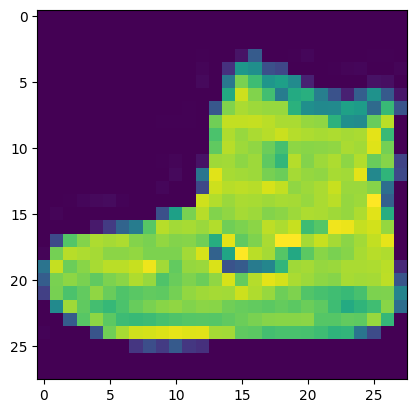

In [4]:
plt.imshow(x_train[0])

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0].max()

255

In [8]:
x_train = x_train/255

In [9]:
x_test = x_test/255

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [12]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [15]:
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_train_one_hot = to_categorical(y_train)

In [18]:
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
y_test_one_hot = to_categorical(y_test)

In [20]:
y_test_one_hot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [22]:
model = Sequential()

# FIRST SET OF LAYERS 

# CONOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# SECOND SET OF LAYERS

# CONOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN MAGES FROM 28 BY 28 TO 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 32)       │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,914 (327.79 KB)

 Trainable params: 83,914 (327.79 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [26]:
model.fit(x_train,y_train_one_hot,epochs=10,validation_data=(x_test,y_test_one_hot),callbacks=[early_stop])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7565 - loss: 0.6713 - val_accuracy: 0.8590 - val_loss: 0.3845
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 13ms/step - accuracy: 0.8750 - loss: 0.3448 - val_accuracy: 0.8755 - val_loss: 0.3545
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8937 - loss: 0.2909 - val_accuracy: 0.8825 - val_loss: 0.3276
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9013 - loss: 0.2683 - val_accuracy: 0.8890 - val_loss: 0.3084
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9109 - loss: 0.2456 - val_accuracy: 0.8814 - val_loss: 0.3348
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9131 - loss: 0.2379 - val_accuracy: 0.8960 - val_loss: 0.2945
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9203 - loss: 0.2141 - val_accuracy: 0.8916 - val_loss: 0.3019
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9218 -

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [27]:
model.metrics_names

['loss', 'compile_metrics']

In [28]:
losses = pd.DataFrame(model.history.history)

In [29]:
losses.head()

,accuracy,loss,val_accuracy,val_loss
0,0.820400,0.493631,0.8590,0.384539
1,0.879150,0.333036,0.8755,0.354472
2,0.894550,0.289222,0.8825,0.327602
3,0.902350,0.265987,0.8890,0.308369
4,0.908567,0.249037,0.8814,0.334781


<Axes: >

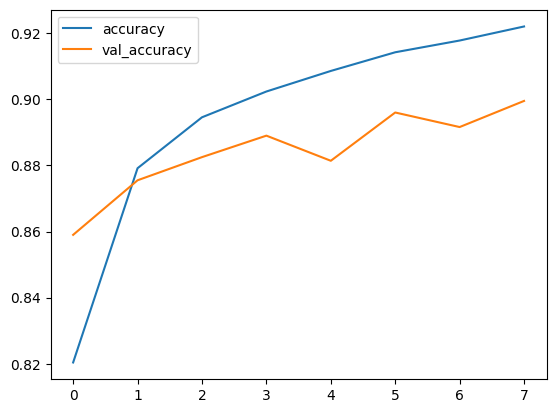

In [30]:
losses[['accuracy', 'val_accuracy']].plot()

<Axes: >

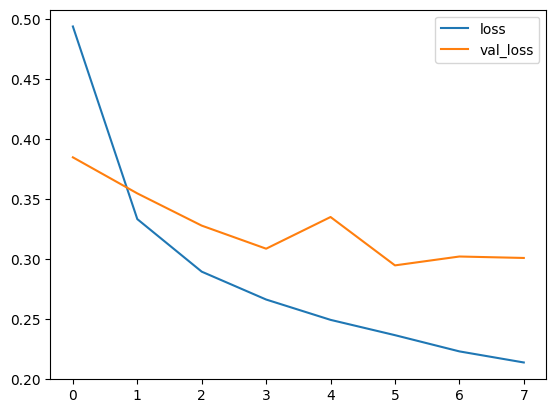

In [31]:
losses[['loss', 'val_loss']].plot()

In [32]:
print(model.metrics_names)
print(model.evaluate(x_test,y_test_one_hot,verbose=0))

['loss', 'compile_metrics']
[0.30064472556114197, 0.8995000123977661]


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [35]:
y_test_one_hot.shape

(10000, 10)

In [36]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [37]:
confusion_matrix(y_test,predictions)

array([[895,   0,  22,  10,   5,   1,  62,   0,   5,   0],
       [  3, 982,   1,  10,   2,   0,   1,   0,   1,   0],
       [ 14,   1, 895,   8,  41,   0,  41,   0,   0,   0],
       [ 33,  13,  13, 864,  43,   0,  34,   0,   0,   0],
       [  2,   0,  71,  16, 867,   0,  44,   0,   0,   0],
       [  0,   0,   0,   0,   0, 982,   0,   9,   0,   9],
       [139,   1, 120,  16,  88,   0, 629,   0,   7,   0],
       [  0,   0,   0,   0,   0,  14,   0, 970,   0,  16],
       [  6,   3,   7,   2,   9,   3,   3,   3, 964,   0],
       [  0,   0,   1,   0,   0,  10,   0,  42,   0, 947]])

<Axes: >

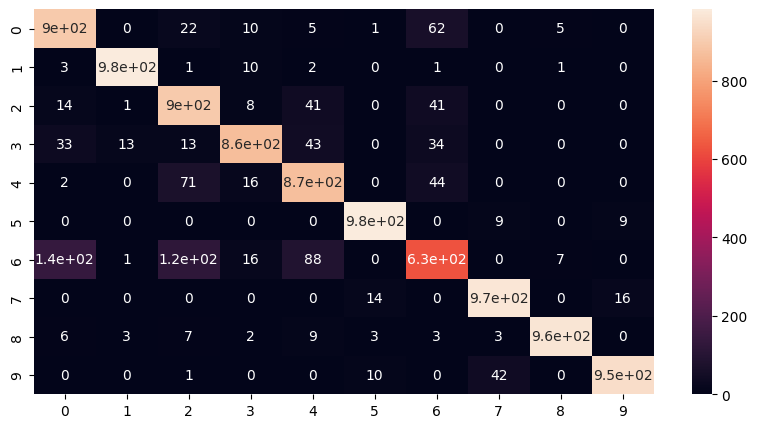

In [38]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.79      0.90      0.84      1000
           3       0.93      0.86      0.90      1000
           4       0.82      0.87      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.77      0.63      0.69      1000
           7       0.95      0.97      0.96      1000
           8       0.99      0.96      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



# Great Job!